# matplotlib中的金融图
1、主要画股票中的k线图,好像不可以获取金融数据了，没有mpf.quotes_historical_yahoo_ochl

2、candlestick_ohlc(ax, quotes, width=0.2, colorup='k', colordown='r', alpha=1.0)  #正收益为蓝色，负收益为红色
**quotes中包含5个数据（时间，开盘，收盘，最低，最高））**
candlestick2_ochl(ax, opens, closes, highs, lows, width=4, colorup='k', colordown='r', alpha=0.75)

3、k线图主要是处理好时间刻度的问题:

tushare返回的是时间是DataFrame类型的，需要进行格式上的转换，web.DataReader可以返回datetime.datetime类的时间

In [ ]:
# pip install mpl_finance

In [4]:
import mpl_finance as mpf
import matplotlib
import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import date2num 
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## candlestick2_ohlc作图

### 传入的时间不是datetime.datetime类型的

In [6]:
#以华夏银行为例--600015.SH
import tushare as ts
pro=ts.pro_api('5f2dc9d17ebed3601a4fbea74148a25067d067138bf88515693e9b7d')
quotes=pro.daily(ts_code='600015.SH', start_date='20180101', end_date='20190101',fields=('trade_date','open','close','high','low'))
# quotes=quotes.rename(columns={'trade_date':'time'})
quotes.head()

,trade_date,open,high,low,close
0,20181228,7.30,7.40,7.30,7.39
1,20181227,7.36,7.36,7.27,7.29
2,20181226,7.28,7.32,7.25,7.28
3,20181225,7.31,7.32,7.20,7.30
4,20181224,7.32,7.37,7.31,7.37


<Figure size 1440x576 with 0 Axes>

(<matplotlib.collections.LineCollection at 0xf8a8748>,
 <matplotlib.collections.PolyCollection at 0xf8a3c88>)

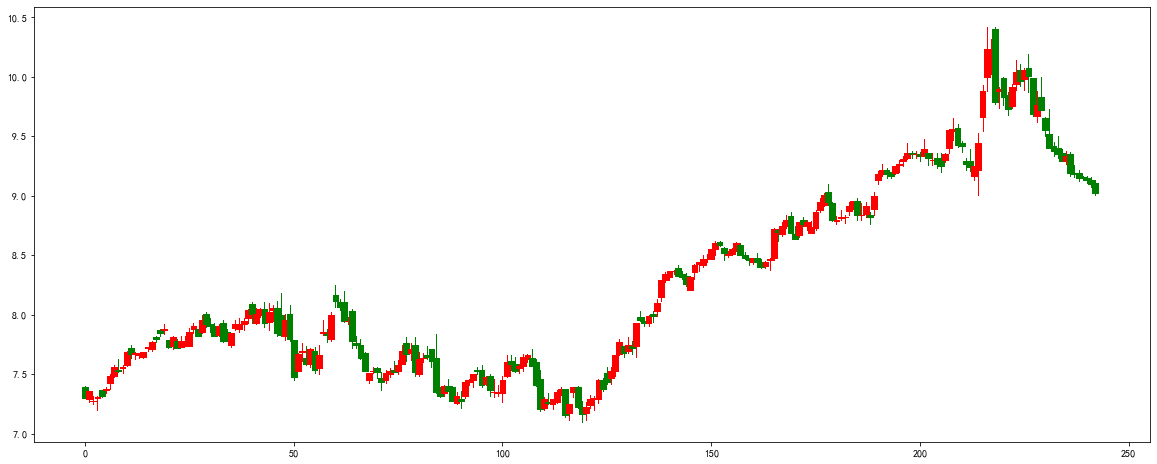

In [11]:
plt.figure(figsize=(20,8),facecolor="white")
ax=plt.subplot(1,1,1)
mpf.candlestick2_ohlc(ax, opens=quotes['open'], closes=quotes['close'], highs=quotes['high'], lows=quotes['low'], width=1.4, colorup='green', colordown='r', alpha=1)

### 传入的时间是datetime.datetime类型的

In [12]:
import pandas_datareader.data as web
results = web.DataReader("600797.SS", "yahoo", datetime.datetime(2018, 1, 1), datetime.datetime(2019, 1, 1))
results.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,11.93,11.75,11.83,11.87,9507327.0,11.772560
2018-01-03,12.26,11.81,11.81,12.17,16068391.0,12.070098
2018-01-04,12.18,12.01,12.06,12.09,10067364.0,11.990755
2018-01-05,12.38,12.03,12.16,12.04,12695730.0,11.941166
2018-01-08,12.55,11.70,11.96,12.32,21512391.0,12.218866


<Figure size 1600x640 with 0 Axes>

(<matplotlib.collections.LineCollection at 0x10615358>,
 <matplotlib.collections.PolyCollection at 0x1095bc88>)

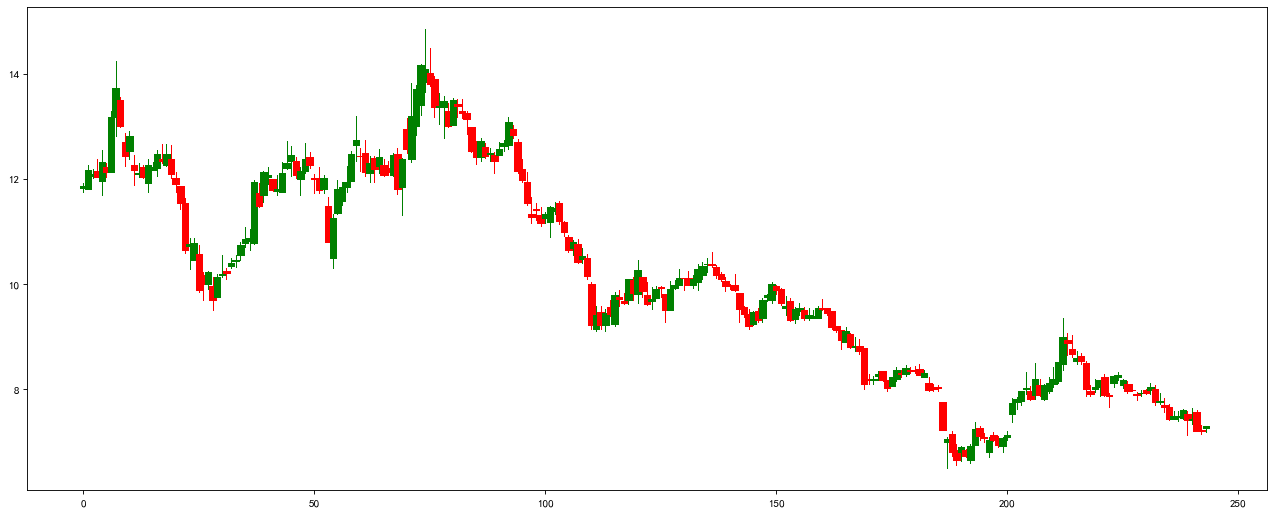

In [16]:
plt.figure(figsize=(20,8),dpi=80)
ax1=plt.subplot(1,1,1)
mpf.candlestick2_ohlc(ax1, opens=results['Open'], closes=results['Close'],highs= results['High'], lows=results['Low'], width=1.4, colorup='green', colordown='r', alpha=1)

### 修改x轴刻度为时间
因为传入的数据中没有时间，所以需要手动修改x轴刻度，将其变为日期
最初x轴的刻度是0,1,2,3，……，
若不想展示每一天的可以取步长：

第一步：对原始刻度取步长--ax1.set_xticks(range(0, len(results.index), 15)) 

第二步：根据步长，替换成对应的日期--- 
new_xticks=[results.index.strftime('%Y-%m-%d')[index] for index in ax1.get_xticks()]  

In [138]:
results.index  #---以它的结果作为刻度时，显示的是  2018-01-02 00:00:00

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-15',
               ...
               '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
               '2018-12-24', '2018-12-25', '2018-12-26', '2018-12-27',
               '2018-12-28', '2019-01-02'],
              dtype='datetime64[ns]', name='Date', length=244, freq=None)

In [153]:
results.index.strftime('%Y-%m-%d')  
#根据strftime（）中的内容将datetime64[ns]  转化成相应的形式，
# %Y-%m-%d 图上显示结果是2018-01-02
# %Y-%m-%d-%H 图上显示结果是2018-01-02-00

Index(['2018-01-02-00', '2018-01-03-00', '2018-01-04-00', '2018-01-05-00',
       '2018-01-08-00', '2018-01-09-00', '2018-01-10-00', '2018-01-11-00',
       '2018-01-12-00', '2018-01-15-00',
       ...
       '2018-12-18-00', '2018-12-19-00', '2018-12-20-00', '2018-12-21-00',
       '2018-12-24-00', '2018-12-25-00', '2018-12-26-00', '2018-12-27-00',
       '2018-12-28-00', '2019-01-02-00'],
      dtype='object', length=244)

<Figure size 1600x640 with 0 Axes>

No handles with labels found to put in legend.


(0, 244)

[Text(0, 0, '2018-01-02'),
 Text(0, 0, '2018-01-23'),
 Text(0, 0, '2018-02-13'),
 Text(0, 0, '2018-03-13'),
 Text(0, 0, '2018-04-03'),
 Text(0, 0, '2018-04-26'),
 Text(0, 0, '2018-05-21'),
 Text(0, 0, '2018-06-11'),
 Text(0, 0, '2018-07-03'),
 Text(0, 0, '2018-07-24'),
 Text(0, 0, '2018-08-14'),
 Text(0, 0, '2018-09-04'),
 Text(0, 0, '2018-09-26'),
 Text(0, 0, '2018-10-24'),
 Text(0, 0, '2018-11-14'),
 Text(0, 0, '2018-12-05'),
 Text(0, 0, '2018-12-26')]

Text(0.5, 1.0, '股票代码：600797.SS 2018-2019年K线图')

Text(0.5, 0, '时间')

Text(0, 0.5, '股价（元）')

(<matplotlib.collections.LineCollection at 0x2bcd1d68>,
 <matplotlib.collections.PolyCollection at 0x2bcc00b8>)

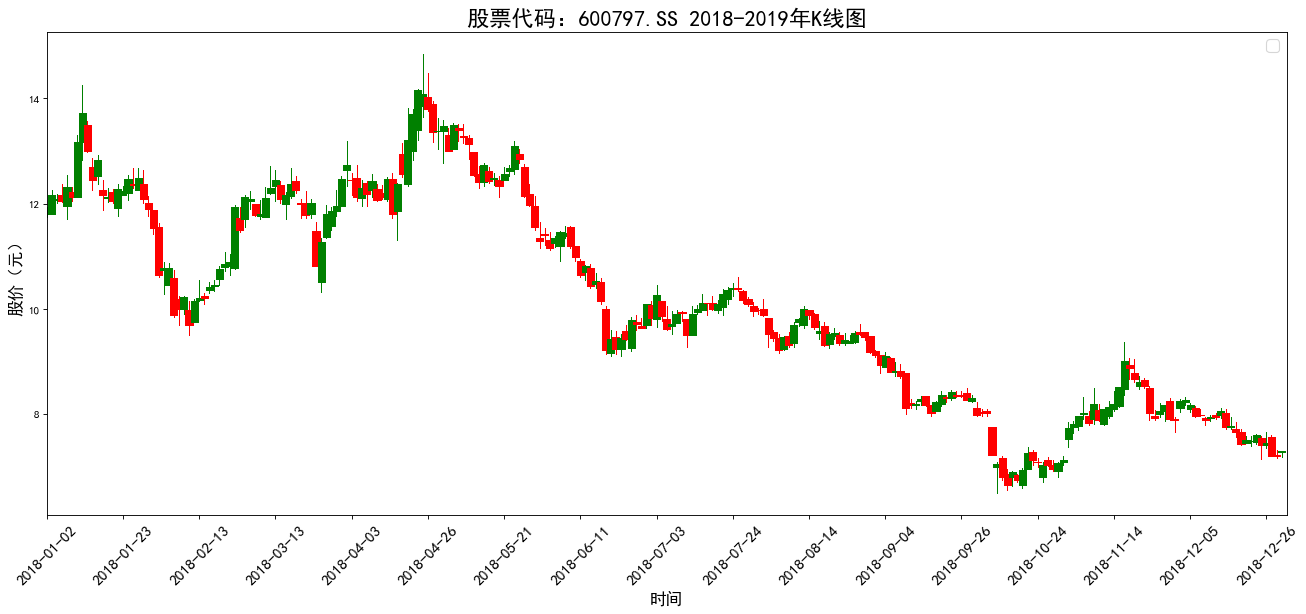

In [155]:

plt.figure(figsize=(20,8),dpi=80)
ax1=plt.subplot(1,1,1)

plt.legend(fontsize=14)
ax1.set_xlim(0, len(results.index))  # 设置一下x轴的范围
# X轴刻度设定 每15天标一个日期----取步长
ax1.set_xticks(range(0, len(results.index), 15))  
# 标签设置为日期,每隔15天取一个
new_xticks=[results.index.strftime('%Y-%m-%d')[index] for index in ax1.get_xticks()] 
#new_xticks=[results.index[i] for i in ax1.get_xticks()]  显示的日期是2018-01-02-00-00-00
ax1.set_xticklabels(new_xticks,fontsize=14,rotation=45)  
plt.yticks.fontsize=30
plt.title("股票代码：600797.SS 2018-2019年K线图",fontsize=20)
plt.xlabel("时间",fontsize=15)
plt.ylabel("股价（元）",fontsize=15)

mpf.candlestick2_ohlc(ax1, opens=results['Open'], closes=results['Close'],highs= results['High'], lows=results['Low'], width=1.4, colorup='green', colordown='r', alpha=1)

In [164]:
不可以通过ax.xaxis_date()的方法进行日期设置
# plt.figure(figsize=(20,8),facecolor="white")
# ax=plt.subplot(1,1,1)

# mpf.candlestick2_ohlc(ax, opens=quotes['open'], closes=quotes['close'], highs=quotes['high'], lows=quotes['low'], width=1.4, colorup='green', colordown='r', alpha=1)
# # ax1=plt.subplot(1,1,1)
# # mpf.candlestick2_ohlc(ax1, opens=results['Open'], closes=results['Close'],highs= results['High'], lows=results['Low'], width=1.4, colorup='green', colordown='r', alpha=1)
# ax.xaxis_date()
# plt.xticks(rotation=45)
# plt.yticks()
# plt.title("股票代码：601558两年K线图")
# plt.xlabel("时间")
# plt.ylabel("股价（元）")

## candlestick_ohlc画图


### 传入的时间不是datetime.datetime类型的
直接传入数据是无法运行的，需要进行修改和调整，转变成candlestick_ohlc可识别的类型
candlestick_ohlc可接受列表参数和单个参数 ,date2num  注意date2num()参数格式为datetime.datetime类；只要是DataFrema数据，都不能直接在candlestick_ohlc方法中使用，需要遍历转换为整形数据
步骤如下：

#### 修改列索引
将日期trade_date作为列索引，并转换成dateframe类型的

In [46]:
import tushare as ts
pro=ts.pro_api('5f2dc9d17ebed3601a4fbea74148a25067d067138bf88515693e9b7d')
quotes=pro.daily(ts_code='600015.SH', start_date='20180101', end_date='20190101',fields=('trade_date','open','close','high','low'))
quotes['trade_date']=quotes['trade_date'].astype('datetime64')
quotes.set_index('trade_date',inplace=True)
quotes.head()

,open,high,low,close
trade_date,,,,
2018-12-28,7.30,7.40,7.30,7.39
2018-12-27,7.36,7.36,7.27,7.29
2018-12-26,7.28,7.32,7.25,7.28
2018-12-25,7.31,7.32,7.20,7.30
2018-12-24,7.32,7.37,7.31,7.37


直接操作会报错----
plt.figure(figsize=(10,3))
ax=plt.subplot(1,1,1)
mpf.candlestick_ohlc(ax=ax,quotes=quotes,width=0.2,colorup='g',colordown='r',alpha=1.0)

In [87]:
# df.iterrows()是一个遍历的函数，生成index和值，即dateframe中一行的数据。
#其中i代表index为行索引值，j代表列索引及对应的数据，为series
for i,j in quotes.iterrows():
    print(j)
    break

open     7.30
high     7.40
low      7.30
close    7.39
Name: 2018-12-28 00:00:00, dtype: float64


#### 结合df.iterrows()修改
**quotes中包含5个数据（时间，开盘，收盘，最高，最低））**
数据传入的顺序必须是（**t,open,high,low,close**）
datetime.datetime.strptime--转化成date2num可识别的数据

t = date2num(date_time)--转化成candlestick_ohlc可以识别的数据

strptime（待转换的内容--**要求为字符串类型**，待匹配的格式）

<Figure size 720x216 with 0 Axes>

([<matplotlib.lines.Line2D at 0x1e887860>,
  <matplotlib.patches.Rectangle at 0x15531438>])

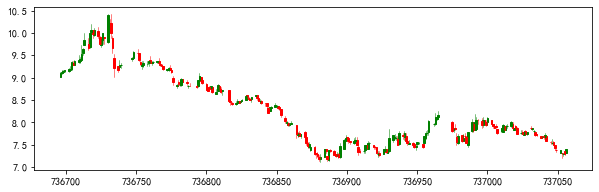

In [89]:
from matplotlib.pylab import date2num
data_list = []
for dates,row in quotes.iterrows():
    # 将时间转换为数字
    date_time = datetime.datetime.strptime(str(dates),'%Y-%m-%d %H:%M:%S')
    t = date2num(date_time)
    open,high,low,close= row[:4]  #将quotes中的相应数据提取出来
    datas = (t,open,high,low,close)  # 传入相关信息： t,open,high,low,close(顺序不可变)
    data_list.append(datas) 
# 创建子图
plt.figure(figsize=(10,3))
ax=plt.subplot(1,1,1)
#datas包含5个数据，而且第一个数据日期经过处理后的
mpf.candlestick_ohlc(ax=ax,quotes=data_list,width=1.2,colorup='g',colordown='r',alpha=1.0)


#### 法二--zip（方法）
五个数据（index,open,colse,high,low），zip方法不需要进行日期的处理，index=0,1,2，……和

interrows（）得到的结果不一样，interrows传入的基本数据是：时间，open,high,low,close

但是和candlestick2_ohlc作出的图的结果一样，因为传入的基本数据顺序均为 open,colse,high,low

<Figure size 720x216 with 0 Axes>

([<matplotlib.lines.Line2D at 0x2638fa58>,
  <matplotlib.patches.Rectangle at 0x270426d8>])

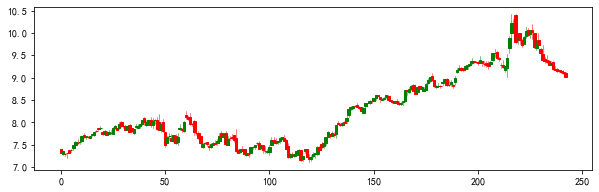

In [129]:
import numpy as np
plt.figure(figsize=(10,3))
ax=plt.subplot(1,1,1)
#t,open,high,low,close
ohlc1 = zip(np.arange(0,len(quotes.index)),quotes.open,quotes.close,quotes.high,quotes.low)#使用zip方法生成数据列表 
#ohlc包含五个数据（t,open,colse,high,low）
mpf.candlestick_ochl(ax, ohlc1, width=1.2, colorup='r', colordown='g', alpha=1.0)#绘制K线走势

In [ ]:
plt.figure(figsize=(20,8),dpi=80)
ax1=plt.subplot(1,1,1)

plt.legend(fontsize=14)
ax1.set_xlim(0, len(results.index))  # 设置一下x轴的范围
# X轴刻度设定 每15天标一个日期----取步长
ax1.set_xticks(range(0, len(results.index), 15))  
# 标签设置为日期,每隔15天取一个
new_xticks=[results.index.strftime('%Y-%m-%d')[index] for index in ax1.get_xticks()] 
#new_xticks=[results.index[i] for i in ax1.get_xticks()]  显示的日期是2018-01-02-00-00-00
ax1.set_xticklabels(new_xticks,fontsize=14,rotation=45)  
plt.yticks.fontsize=30
plt.title("股票代码：600797.SS 2018-2019年K线图",fontsize=20)
plt.xlabel("时间",fontsize=15)
plt.ylabel("股价（元）",fontsize=15)

### 传入的时间是datetime.datetime类型的

In [21]:
import pandas_datareader.data as web
results = web.DataReader("600797.SS", "yahoo", datetime.datetime(2018, 1, 1), datetime.datetime(2019, 1, 1))
results.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,11.93,11.75,11.83,11.87,9507327.0,11.772560
2018-01-03,12.26,11.81,11.81,12.17,16068391.0,12.070098
2018-01-04,12.18,12.01,12.06,12.09,10067364.0,11.990755
2018-01-05,12.38,12.03,12.16,12.04,12695730.0,11.941166
2018-01-08,12.55,11.70,11.96,12.32,21512391.0,12.218866


In [96]:
for dates,row in results.iterrows():
    print(dates,row)
    break

2018-01-02 00:00:00 High         1.193000e+01
Low          1.175000e+01
Open         1.183000e+01
Close        1.187000e+01
Volume       9.507327e+06
Adj Close    1.177256e+01
Name: 2018-01-02 00:00:00, dtype: float64


#### 修改法一：iterrows()
x轴刻度是变成date2num格式后的时间

<Figure size 720x216 with 0 Axes>

([<matplotlib.lines.Line2D at 0x20572b38>,
  <matplotlib.patches.Rectangle at 0x20b5a198>])

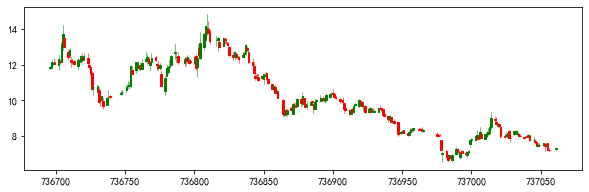

In [104]:
from matplotlib.pylab import date2num
data_list = []
for dates,row in results.iterrows():
    date_time = datetime.datetime.strptime(str(dates),'%Y-%m-%d %H:%M:%S')
    t = date2num(date_time)
    high,low,open,close = row[:4] ##根据results结果提取所需信息
    datas = (t,open,high,low,close)  #此处必须是 t,open,high,low,close
    data_list.append(datas) 
# 创建子图
plt.figure(figsize=(10,3))
ax1=plt.subplot(1,1,1)
mpf.candlestick_ohlc(ax=ax1,quotes=data_list,width=1.2,colorup='g',colordown='r',alpha=1.0)

#### 法二：zip（方法）
此处传入的参数必须是，t,**open,colse,high,low**，后面四个数据和**candlestick2_ohlch**中传入的参数顺序一致
x轴刻度是0,1,2……

In [117]:
for i in zip(range(len(results.index)),results.Open,results.Close,results.High,results.Low):
    print(i)
    break

(0, 11.829999923706055, 11.869999885559082, 11.930000305175781, 11.75)


<Figure size 720x216 with 0 Axes>

([<matplotlib.lines.Line2D at 0x30add278>,
  <matplotlib.patches.Rectangle at 0x30fb02e8>])

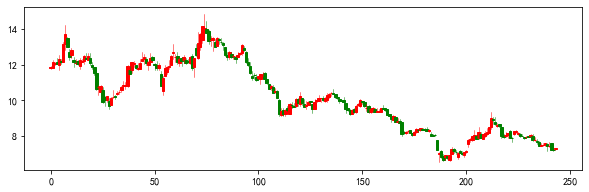

In [169]:
import numpy as np
plt.figure(figsize=(10,3))
ax1=plt.subplot(1,1,1)
ohlc = zip(np.arange(0,len(results.index)),results.Open,results.Close,results.High,results.Low)#使用zip方法生成数据列表 
#ohlc包含五个数据（t,open,colse,high,low）
mpf.candlestick_ochl(ax1, ohlc, width=1.2, colorup='r', colordown='g', alpha=1.0)#绘制K线走势

### 修改x轴刻度

## 设置X轴刻度为日期时间
### ax.xaxis_date()   ---得到每两个月的结果 
适用于candlestick_ohl作图中通过 iterrows()方式修改日期的形式

zip方式和 candlestick2_ohl作图不适用，需要用常规方法

<Figure size 720x216 with 0 Axes>

([<matplotlib.lines.Line2D at 0x2faa1f28>,
  <matplotlib.patches.Rectangle at 0x2ff957f0>])

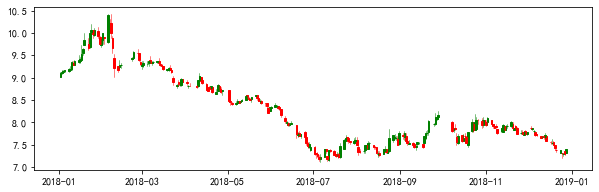

In [166]:
from matplotlib.pylab import date2num
data_list = []
for dates,row in quotes.iterrows():
    date_time = datetime.datetime.strptime(str(dates),'%Y-%m-%d %H:%M:%S')
    t = date2num(date_time)
    open,high,low,close= row[:4]  #将quotes中的相应数据提取出来
    datas = (t,open,high,low,close)  # 传入相关信息： t,open,high,low,close(顺序不可变)
    data_list.append(datas) 
    
plt.figure(figsize=(10,3))
ax=plt.subplot(1,1,1)
mpf.candlestick_ohlc(ax=ax,quotes=data_list,width=1.2,colorup='g',colordown='r',alpha=1.0)
ax.xaxis_date()

### 常规方法
**适用于x轴刻度为0,1,2，……的如：zip生成日期的candlestick_ohlc和candlestick2_ohlc**

因为传入的数据中没有时间，所以需要手动修改x轴刻度，将其变为日期
最初x轴的刻度是0,1,2,3，……，
若不想展示每一天的可以取步长：

第一步：对原始刻度取步长--ax1.set_xticks(range(0, len(results.index), 15)) 

第二步：根据步长，替换成对应的日期--- 
new_xticks=[results.index.strftime('%Y-%m-%d')[index] for index in ax1.get_xticks()] 

In [ ]:
plt.figure(figsize=(20,8),dpi=80)
ax1=plt.subplot(1,1,1)

plt.legend(fontsize=14)
ax1.set_xlim(0, len(results.index))  # 设置一下x轴的范围
# X轴刻度设定 每15天标一个日期----取步长
ax1.set_xticks(range(0, len(results.index), 15))  
# 标签设置为日期,每隔15天取一个
new_xticks=[results.index.strftime('%Y-%m-%d')[index] for index in ax1.get_xticks()] 
#new_xticks=[results.index[i] for i in ax1.get_xticks()]  显示的日期是2018-01-02-00-00-00
ax1.set_xticklabels(new_xticks,fontsize=14,rotation=45)  
plt.yticks.fontsize=30
plt.title("股票代码：600797.SS 2018-2019年K线图",fontsize=20)
plt.xlabel("时间",fontsize=15)
plt.ylabel("股价（元）",fontsize=15)

mpf.candlestick2_ohlc(ax1, opens=results['Open'], closes=results['Close'],highs= results['High'], lows=results['Low'], width=1.4, colorup='green', colordown='r', alpha=1)

<Figure size 720x216 with 0 Axes>

([<matplotlib.lines.Line2D at 0x32a4e080>,
  <matplotlib.patches.Rectangle at 0x29854400>])

(0, 244)

[Text(0, 0, '2018-01-02'),
 Text(0, 0, '2018-01-23'),
 Text(0, 0, '2018-02-13'),
 Text(0, 0, '2018-03-13'),
 Text(0, 0, '2018-04-03'),
 Text(0, 0, '2018-04-26'),
 Text(0, 0, '2018-05-21'),
 Text(0, 0, '2018-06-11'),
 Text(0, 0, '2018-07-03'),
 Text(0, 0, '2018-07-24'),
 Text(0, 0, '2018-08-14'),
 Text(0, 0, '2018-09-04'),
 Text(0, 0, '2018-09-26'),
 Text(0, 0, '2018-10-24'),
 Text(0, 0, '2018-11-14'),
 Text(0, 0, '2018-12-05'),
 Text(0, 0, '2018-12-26')]

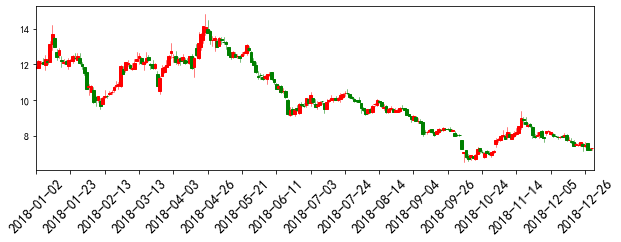

In [173]:
import numpy as np
plt.figure(figsize=(10,3))
ax1=plt.subplot(1,1,1)
ohlc = zip(np.arange(0,len(results.index)),results.Open,results.Close,results.High,results.Low)#使用zip方法生成数据列表 
mpf.candlestick_ochl(ax1, ohlc, width=1.2, colorup='r', colordown='g', alpha=1.0)#绘制K线走势

ax1.set_xlim(0, len(results.index)) 
ax1.set_xticks(range(0, len(results.index), 15))  
new_xticks=[results.index.strftime('%Y-%m-%d')[index] for index in ax1.get_xticks()] 
ax1.set_xticklabels(new_xticks,fontsize=14,rotation=45) 